<a href="https://colab.research.google.com/github/gustavox0/MasterBigData/blob/main/M2_AI3_SalazarGustavo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#monto la carpeta de drive para trabajar los archivos desde ahí
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargo los paquetes pandas y numpy como pd y np, respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargo la base de facturas
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tema1MBDDS/datos_facturas.csv',sep=';')
#Reviso el contenido de la base y las variables que contiene
#df=pd.read_csv('https://github.com/gustavox0/MasterBigData/blob/main/datos_facturas.csv',sep=';')
df.head()

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,01/01/2010,Enero,clienteA,si,100,normal,18,18,118
1,2,02/01/2010,Enero,clienteB,no,150,normal,18,27,177
2,3,03/01/2010,Enero,clienteC,si,75,normal,18,"13,5","88,5"
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36,236
4,5,05/01/2010,Enero,clienteA,no,125,normal,18,"22,5","147,5"


#Clasificación de las variables
**id**: identificador correlativo y secuencial del número de registros de facturas. Se trata de una variabla para identificar a los individuos, por lo que es de tipo cualitativa nominal.

**fecha**: fecha en la que se generó la factura. Se trata de una variable para identificar el tiempo en que se creó la factura, por lo que es de tipo cualitativa nominal.

**mes**: mes en la que se generó la factura. Se trata de una variable para identificar el mes en que se creó la factura, por lo que es de tipo cualitativa nominal.

**cliente**: tipo de cliente, clasificado de la A a la D. Permite clasificar a los clientes por lo que se trata de una variable cualitativa nominal (de clasificación)

**factura_pagada**: descriptivo de si está pagada o no, en la fecha de generación. Solo toma dos valores o categorias, por lo que se trata de una variable cualitativa dicotómica.

**importe_factura**: importe neto sin el IVA. se trata de una variable monetaria sobre el monto pagado por lo que se una variable cuantitativa de tipo discreto.

**tipo_IVA**: es el tipo de impuesto aplicado (descriptivo). Solo toma los valores nominales 'normal' y 'reducido', por lo que se trata de una variable cualitativa de tipo dicotómico.

**porcentaje_IVA**: es el porcentaje aplicado. solo toma dos valores numéricos 18 y 8. Por tanto, se trata de una variable cuantitativa discreta. Esta variable tambien puede pensarse como cualitativa, ya que estos valores tambien se pueden pensar como el tipo_IVA (18 como impuesto normal y 8 como impuesto reducido).

**IVA**: es el valor numérico del porcentaje correspondiente a la factura. Representa el valor monetario del impuesto. En principio puede tomar cualquier valor mayor que cero, por tanto se trata de una variable cuantitiva continua.

**total_pagado**: es el importe bruto de la factura (el neto más el importe IVA). Puede tomar cualquier valor mayor que cero, por tanto se trata de una variable cuantitiva continua.

In [ ]:
#Reviso la base para ver el tipo de las variables.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               45 non-null     int64 
 1   fecha            45 non-null     object
 2   mes              45 non-null     object
 3   cliente          45 non-null     object
 4   factura_pagada   45 non-null     object
 5   importe_factura  45 non-null     int64 
 6   tipo_IVA         45 non-null     object
 7   porcentaje_IVA   45 non-null     int64 
 8   IVA              45 non-null     object
 9   total_pagado     45 non-null     object
dtypes: int64(3), object(7)
memory usage: 3.6+ KB
None


De lo anterior, observo que "IVA" y "total_pagado" se encuentran como objetos. Para poder trabajar con dichas variables, en una copia de la base las convierto a tipo float y cambio las "," por "."

In [ ]:
#Copia de la base y transformación de las variables
DF=df.copy()
DF['IVA']=DF['IVA'].str.replace(",",".").astype(float)
DF['total_pagado']=DF['total_pagado'].str.replace(",",".").astype(float)

Con el dataset de la gestión de facturas, debes analizar la variable “total pagado” para poder responder a las siguientes preguntas:

#Parte1: Unidimensional#


##1.Hallar las medidas de centralización: media, mediana y moda. Analiza los resultados obtenidos.##

In [ ]:
#calculo la media, mediana y moda
Media=DF['total_pagado'].mean()
print('Media:',round(Media,2))
Me=DF['total_pagado'].median()
print('Mediana:',round(Me,2))
Mo=DF['total_pagado'].mode()
print('Moda:',round(Mo,2))

Media: 147.31
Mediana: 135.0
Moda: 0    118.0
1    236.0
Name: total_pagado, dtype: float64


Observamos que tenemos dos modas: 118 y 236, por lo que se trata de una distribución bi-modal. En este sentido, tanto la media como la mediana se encuentran entre ambas modas. En términos de ventas, significa que las ventas están segmentadas posiblemente por dos grupos de clientes; un grupo con compras elevadas y otro grupo con compras más bajas.

##2.Las medidas de dispersión: rango, varianza, desviación típica y coeficiente de variación. Analiza los resultados obtenidos.#

In [ ]:
#Cálculo el rango como el valar maximo de la variable menos su valor mínimno.
Rango=DF['total_pagado'].max()-DF['total_pagado'].min()
print('Rango:',round(Rango,2))
#Cálculo la varianza
Var=DF['total_pagado'].var()
print('Varianza:',round(Var,2))
#Cálculo la desviación standar
Dt = np.sqrt(Var)
print('Desviación:',round(Dt,2))
#Cálculo del Coeficiente de Variación
CV=Dt/DF['total_pagado'].mean()
print('Coeficiente de Variacion:',round(CV,2))

Rango: 206.5
Varianza: 3356.59
Desviación: 57.94
Coeficiente de Variacion: 0.39


La variable tiene un rango de 206.5 y una varianza de 3,335.59, lo que refleja una gran dispersión de los datos aldedor de la media (147.31). El CV en este caso, es 39% (inferior a 80%) por lo que el conjunto de datos es homogéneo. Esta variabilidad elevada en las ventas, podría representar un riesgo financiero para la empresa.  

##3.Las medidas de posición: rango intercuartílico, cuartil primero y percentil 90. Analiza los resultados obtenidos.##


In [ ]:
#Rango Intercuartítico
#Debemos calcular primero los cuartiles 3 (Q3) y 1 (Q1)
Q3 = DF['total_pagado'].quantile(0.75)
Q1 = DF['total_pagado'].quantile(0.25) #este es el cuartil primero que tambien solicita el ejercicio.
RI = Q3-Q1
print('Rango Intercuartílico:',round(RI,2))
print('Cuartil primero:',round(Q1,2))
#percentil 90
p90=np.percentile(DF['total_pagado'],90)
print('Percentil 90:',round(p90,2))

Rango Intercuartílico: 81.0
Cuartil primero: 108.0
Percentil 90: 236.0


El primer cuartil muestra que el 25% de las ventas son inferiores a 108 euros y solo el 10% superan 236 euros.

##4.Las medidas de concentración y forma: curtosis, asimetría y el gráfico asociado. Analiza los resultados obtenidos.##

In [ ]:
#Curtosis
Curtosis=DF['total_pagado'].kurtosis()
print('Curtosis:',round(Curtosis,2))

Curtosis: -0.8


La Curtosis de la variable es negativa, es decir, que la distribución es platicúrtica. Esto implica que las ventas no se disparan (las ventas son "planas") y que además hay mucha dispersión de las ventas alrededor de la media.

In [ ]:
#Coeficiente de asimetría
CAF=DF['total_pagado'].skew()
print('Asimetria:',round(CAF,2))

Asimetria: 0.1


El CAF es positivo por lo que la distribución es asimétrica positiva. Ello significa que los valores de la distribución se concentran más en la izquierda de la distribución. Esto también quiere decir que hay valores de ventas muy elevados que estan alejados de la media. En otras palabras, hay transacciones que elevan el promedio.

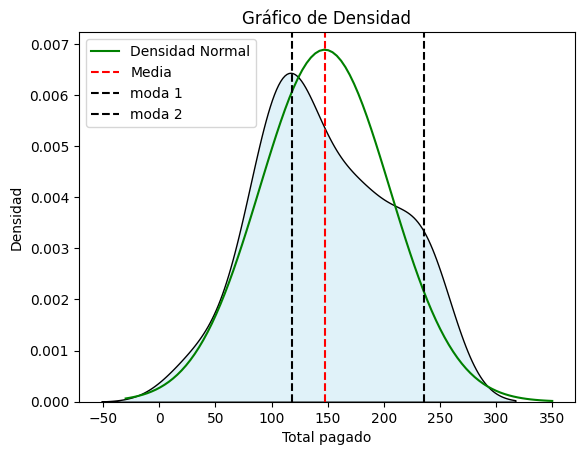

In [ ]:
#Gráfico asociado
from scipy.stats import norm
sns.kdeplot(DF['total_pagado'], fill=True, color="skyblue",edgecolor='black')

x = np.linspace(-30, 350, 100)
densidad=norm.pdf(x,loc=Media,scale=Dt)
plt.plot(x, densidad, color='green', linestyle='-', label="Densidad Normal")

# Leyendas
plt.title("Gráfico de Densidad")
plt.xlabel("Total pagado")
plt.ylabel("Densidad")
plt.axvline(x=DF['total_pagado'].mean(), color='r', linestyle='--',label="Media")
plt.axvline(x=DF['total_pagado'].mode()[0], color='black', linestyle='--',label="moda 1")
plt.axvline(x=DF['total_pagado'].mode()[1], color='black', linestyle='--',label="moda 2")
plt.legend()
plt.show()

Como se observa en el gráfico, con respecto a la distribución normal, la variable "total_pagado" es bimodal. De acuerdo con la curtosis, la distribución es platicúrtica, por lo que las ventas estan más distribuidas de manera más uniforme y, por tanto, no se concentran en la media (distribución más aplanada con respecto a una distribución normal). De igual manera, la distribución de las ventas es asimétrica positiva, lo que significa que hay ventas muy elevadas alejadas de la media que aumentan el promedio.

##5.Realiza un análisis de todos los datos obtenidos en los apartados anteriores y añade un gráfico de box-plot explicando los resultados.##

De acuerdo con las estadísticas estimadas, los montos facturados de la compañía se encuentran entre $29$ y $236$ euros (rango de 206.5), con una elevada variabilidad. Esto podria representar un riesgo para su operación. Asimismo, se observan dos grupos de clientes, unos con montos de facturación elevados y otro con montos de facturación más pequeños. El 50% de las ventas inferiores a la mediana se encuentran más concentradas que aquellas que estan por encima de la mediana. En el gráfico de Boxplot a continuación se observa dicha variabilidad y la existencia de, posiblemente, dos grupos de usuarios.

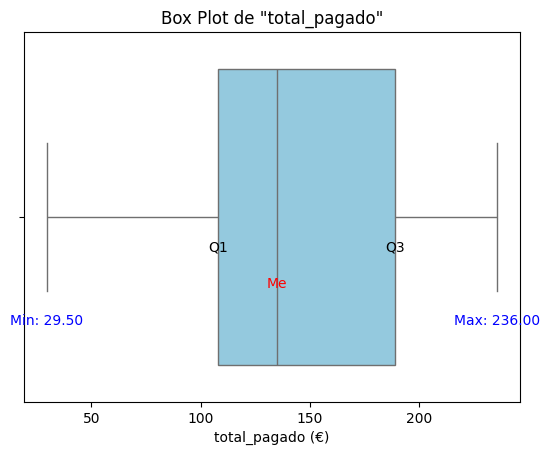

In [ ]:
# Gráfico de Boxplot
sns.boxplot(x=DF['total_pagado'], color='skyblue')
plt.title('Box Plot de "total_pagado"')
plt.xlabel('total_pagado (\u20AC)')
# Agregar las estadísticas al gráfico
plt.text(Q1, 0.1, "Q1", ha='center', va='bottom', color='black')  # Q1
plt.text(Me, 0.2, "Me", ha='center', va='bottom', color='red') # Mediana
plt.text(Q3, 0.1, "Q3", ha='center', va='bottom', color='black')  # Q3
plt.text(DF['total_pagado'].min(), 0.3, f"Min: {DF['total_pagado'].min():.2f}", ha='center', va='bottom', color='blue') # Mínimo
plt.text(DF['total_pagado'].max(), 0.3, f"Max: {DF['total_pagado'].max():.2f}", ha='center', va='bottom', color='blue') # Máximo
plt.show()

#Parte2: Análisis de la información de la empresa y su situación#


##1.Analiza los resultados e informa de quién es el cliente que ha pagado MÁS en todas las facturas.##

In [ ]:
#Para encontrar el cliente que más ha pagado necesito agrupar la informacion de "total_pagado" por "cliente"
Pago_cliente=DF.groupby('cliente')['total_pagado'].sum()
Pago_cliente=Pago_cliente.sort_values(ascending=False) #Ordeno los datos en forma descendente
print(Pago_cliente)

cliente
clienteA    2099.0
clienteD    2038.4
clienteB    1337.0
clienteC    1154.5
Name: total_pagado, dtype: float64


De lo anterior, obervamos que el cliente que más ha pagado en todas las facturas es el Cliente A con 2099 euros.  

##2.Analiza los resultados e informa de quién es el cliente que ha pagado MENOS facturas en el mes de febrero.##

In [ ]:
#Neceitamos contar las observaciones por cliente y por mes
#Primero filtro los datos del mes de febrero
Dato=DF[df['mes']=='Febrero'] #Dato solo contiene datos para febrero
fact_febrero=Dato.groupby('cliente').size().sort_values(ascending=True) #agrupo por cliente y cuento. ordeno ascendente
print(fact_febrero)

cliente
clienteB    3
clienteC    3
clienteA    4
clienteD    4
dtype: int64


De acuerdo con lo anterior, los cliente que han pagado menos facturas en el mes de febrero son los cliente B y C con solo 3 facturas

##3.Añadir un gráfico de box-plot de los clientes. Conclusiones y recomendaciones después de todo el análisis realizado.##

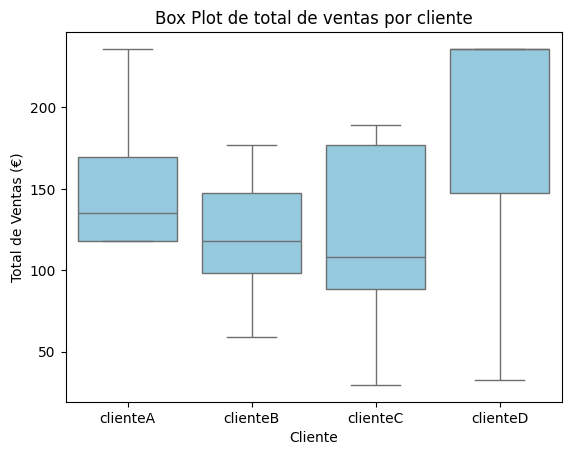

In [ ]:
#Gráfico Boxplot
Pago_cliente=DF.groupby('cliente')['total_pagado'].sum().reset_index()
sns.boxplot(x=DF['cliente'],y=DF['total_pagado'], data=Pago_cliente, color='skyblue')
plt.title('Box Plot de total de ventas por cliente')
plt.xlabel('Cliente')
plt.ylabel('Total de Ventas (\u20AC)')
plt.show()

De acuerdo con el diagrama de box plot, los clientes A y D son los que tienen montos de venta mayores. Estos grupos de clientes son los que hacen que la districución de las ventas sea asimétrica positiva. De igual manera, se observa que los clientes A y B son los que facturan montos mas bajos. Tambien son los que se encuentran más concentrados por debajo de la mediana. En este grupo de clientes se requiere aumentar las ventas.

#Parte 3: Análisis Bidimensional#
Crea un gráfico de dispersión que represente el total pagado de las facturas respecto del IVA aplicado. Explica el resultado obtenido.
Determina el valor de la covarianza de ambas variables. Analiza el dato resultante obtenido.
¿Se podría hacer un modelo predictivo? ¿porque?

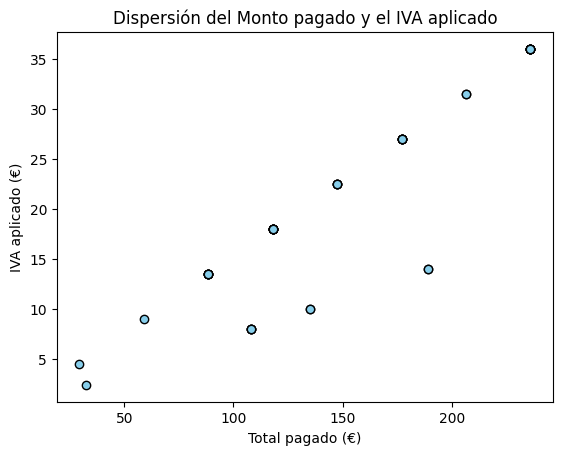

In [ ]:
## Nube de puntos
plt.scatter(DF['total_pagado'],DF['IVA'], color='skyblue',edgecolors='black')

#leyenda
plt.title("Dispersión del Monto pagado y el IVA aplicado")
plt.xlabel("Total pagado (\u20AC)")
plt.ylabel("IVA aplicado (\u20AC)")
plt.show()

De acuerdo con el diagrama de dispersión, existe una relación positiva entre el monto pagado y el iva aplicado. Es decir, a medida que el monto pagado aumenta, mayor el monto de impuesto que depen pagarse. También se observa que para algunos montos pagado el impuesto no es tan elevado, en comparación a montos pagados similares. Esto se debe a que existe un regimen de pago de impuestos "reducido". En otras palabras, estan sujetos a una menor tasa de impuestos.

**Covarianza**

In [ ]:
#Covarianza ente iva y total pagado
Cov=DF['total_pagado'].cov(DF['IVA'])
print('Covarianza',round(Cov,2))

Covarianza 526.77


Como puede observarse, la correlación entre el total pagado y el iva aplicable es positiva (526.77). Esto quiere decir que varian en el mismo sentido: a medida que incrementa el monto pagado, tambien incrementa al iva que se paga.

En principio observamos que, si bien se perciben dos "grupos" de niveles de iva pagado, estos tienen la misma tendencia y por tanto podría ajustarse una línea de regresión como modelo predictivo. Sin embargo, se puede ajustar mejor el modelo predictivo si se consideran dos grupos y se ajustan dos líneas de regresión. Puede hacerse una línea de regresión para los datos que corresponden al impuesto "normal" y otra línea de regresión para los datos que corresponde al impuesto "reducido".

##Parte 4: Análisis Global##
Analiza toda la información obtenida. ¿Cuál sería la recomendación que darías para la toma de decisión en la compañía?

Dados las estadísticas obsevadas, se recomienda lo siguiente:


*   Las ventas tienen dos modas, lo que identifica en general dos grupos de clientes. Además, existe una alta variabilidad en las ventas (elevado varianza), lo podría ser riesgoso para la empresa.
De acuerdo con el primer cuartil, el 25% de los clientes tienen compras inferiores a 108 euros y sólo el 10% superan los 236 euros.
Por tanto se sugiere lanzar campañas específicas para, por un lado, incentivar las ventas y los montos facturados del grupo de clientes que actualmente compran menos y, poir otro lado, ofrecer programas de lealtad para los clientes que actualmente compran más. Por ejemplo, para los clientes que se encuentran en la moda más elevada se podrían ofrecer ofertas de fidelización. Para los clientes que se encuentran en la moda mas baja, se pueden ofrecer promociones como descuentos por volumen (Clientes B y C).

*   Dada la relación positiva entre el IVA y los montos de venta, una estrategia de fidelización podria ser ofrecer promociones enfocadas en la reduccion de IVA para los clientes que más facturan (Clientes A y D).
Para que la promoción se encuentre mejor enfocada, se sugiere ajustar una modelo predictivo para los clientes que pagan IVA normal y otro ajuste para los clientes que pagan IVA reducido.

